# Directing Customers to subscription through App behaviour analysis

In today's market,many companies have a mobile presence. Often these companies provide free products and services in their mobile apps in an attempt to transition their customers to paid membership. Since marketing efforts are never free, these companies need to know exactly who to target with offers and promotions.


Market: The target audience for this project are customers who are using the company's free product.

Product: The paid memberships often provide enhanced versions of free products already given for free.


Goal: The objective of this project is to predict which users will not subscribe to the paid membership, so that greater marketing efforts can go into trying to "convert" them to paid users.

Features in brief:

1. user: Unique ID for each user.


2. first_open: Date (yy-mm-dd) and time (Hour:Minute:Seconds:Milliseconds) of login on app first time.


3. dayofweek: On which day user logged in.


0: Sunday


1: Monday


2: Tuesday


3: Wednesday


4: Thursday


5: Friday


6: Saturday



4. Hour: Time of a day in 24-hour format customer logon. It is correlated with dayofweek column.



5. age: The age of the registered user.



6. screen_list: The name of multiple screens seen by customers, which are separated by a comma.



7. numscreens: The total number of screens seen by customers.



8. minigame: Tha app contains small games related to finance. If the customer played mini-game then 1 otherwise 0.



9. used_premium_feature: If the customer used the premium feature of the app then 1 otherwise 0.



10. enrolled: If the user bought a premium feature app then 1 otherwise 0.



11. enrolled_date: On the date (yy-mm-dd) and time (Hour:Minute:Seconds:Milliseconds) the user bought a premium features app.



12. liked: The each screen of the app has a like button if the customer likes it then 1 otherwise 0.

In [1]:
import pandas as pd
from dateutil import parser
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv('appdata10.csv')
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [3]:
dataset.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
# Convert the hour column to int and split it, to use only first two numbers.
dataset["hour"] = dataset.hour.str.slice(1, 3).astype(int)

In [5]:
dataset2 = dataset.copy().drop(columns = ['user', 'screen_list', 'enrolled_date',
                                           'first_open', 'enrolled'])
dataset2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


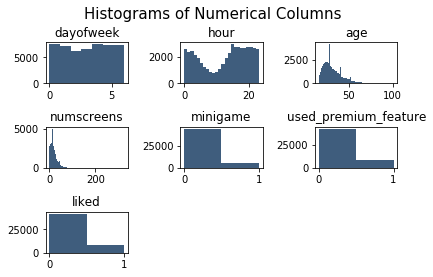

In [6]:
plt.suptitle('Histograms of Numerical Columns', fontsize=15)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(3, 3, i)
    f = plt.gca()
#    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])

    vals = np.size(dataset2.iloc[:, i - 1].unique())
    
    plt.hist(dataset2.iloc[:, i - 1], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

The Day of the week is evenly distributed i.e., no particular day seems to favour the users installing the app.

Hour: Most users do not use the app in the morning. However, usage(enrolling) increases through evenings and late nights.

Age: Fairly evenly distributed, with specific peaks. Lower the age, higher the enrollment.

Num of Screens: Evenly distributed, with a few outliers.

Minigame: Most users have not played the minigame.

Premium Feature: Most users have not used the premium feature.

Like: Most users have not liked any of the features. 

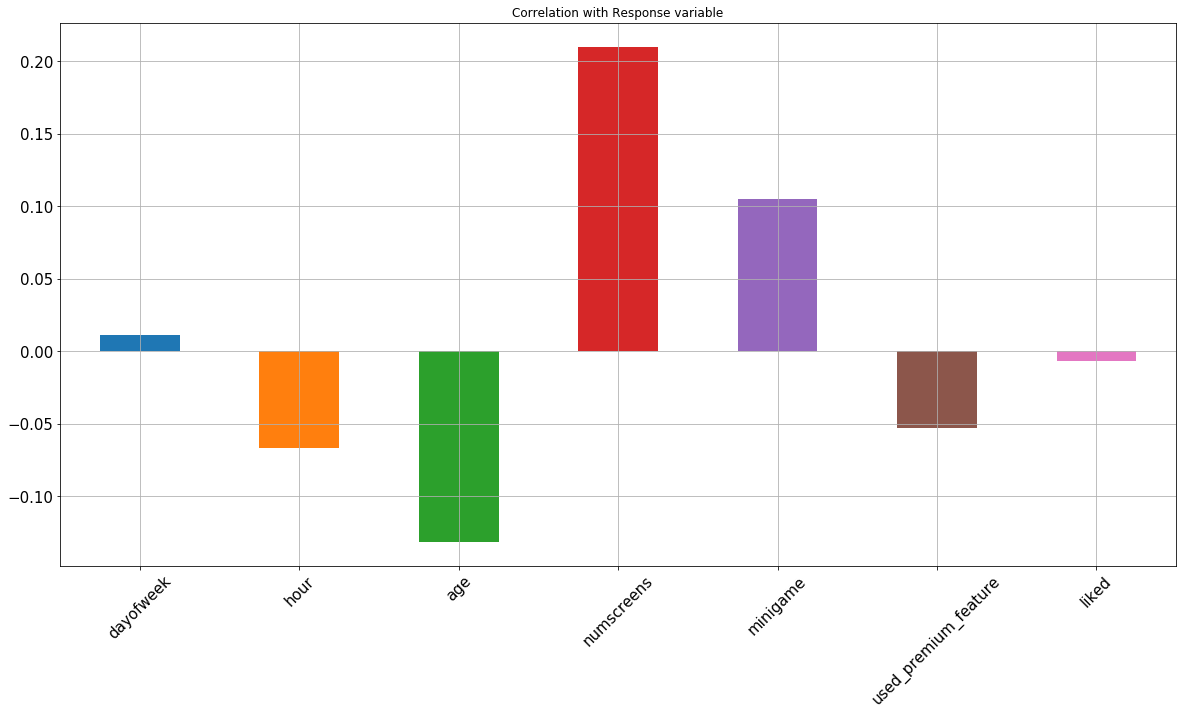

In [7]:
#Correlation with Response Variable
dataset2.corrwith(dataset.enrolled).plot.bar(figsize=(20,10),title = 'Correlation with Response variable',
                  fontsize = 15, rot = 45,grid = True)
plt.show()

The Response Variable is 'enrolled'.

The day of week is weakly correlated to enrollment, i.e., enrollment is not affected by the days of the week.

hour is slightly,negatively correlated to enrollment i.e., most enrollments happen at late nights.

Age is negatively correlated to the response variable i.e., lower the age greater the chances of enrollment.

Num of screens is highly, positively correlated to the response variable. This shows that the users are more engaged and hence there is higher chance of enrollment.

Mini game, Liked(feature) are positively correlated. However, the correlation is not strong.

Used premium feature is negatively correlated, i.e., users who have used the premium feature are less likely to enroll.


In [8]:
# Correlation Matrix
sn.set(style="white", font_scale=2)

In [9]:
# Compute the correlation matrix
corr = dataset2.corr()

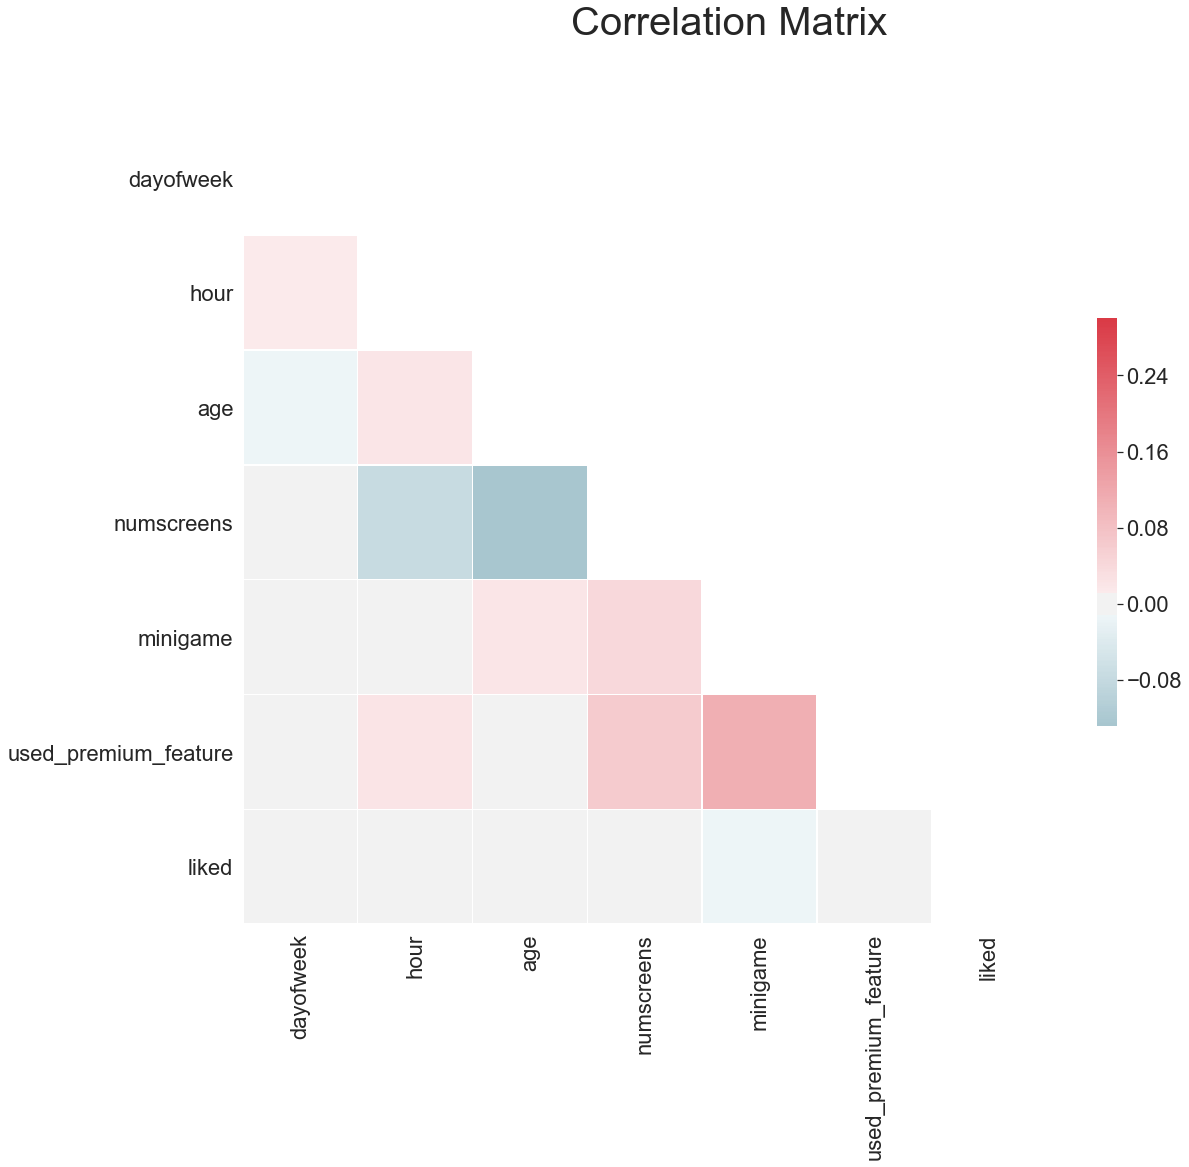

In [10]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))
f.suptitle("Correlation Matrix", fontsize = 40)

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=0.5,
           cbar_kws={"shrink": .5})
plt.show()

## Feature Engineering 

### Fine tuning the response variable.

It is important because we need to set a limit on when we expect a user to convert to paid member. For example if we have a time limit of one week for enrollments to consider, then we only need to wait one week or so to check if the model was accurate in predicting that user. But if the model was to predict an all time enrollment then we will have to wait until the end of all time to see if the prediction was accurate or not! So that is why it is important to have a particular date range limits to understand what time limit is optimal.

In [11]:
# Formatting Date Columns
dataset.dtypes
dataset["first_open"] = [parser.parse(row_date) for row_date in dataset["first_open"]]
dataset["enrolled_date"] = [parser.parse(row_date) if isinstance(row_date, str) else row_date for row_date in dataset["enrolled_date"]]
dataset.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

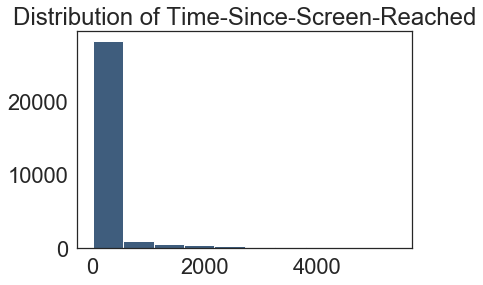

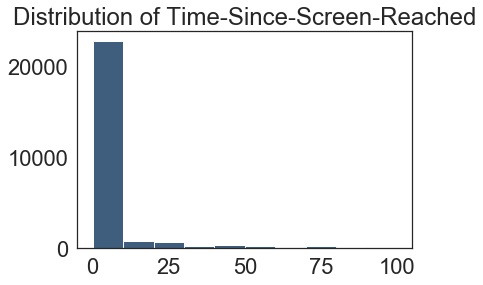

In [12]:
# Selecting Time For Response
dataset["difference"] = (dataset.enrolled_date-dataset.first_open).astype('timedelta64[h]')
response_hist = plt.hist(dataset["difference"].dropna(), color='#3F5D7D')
plt.title('Distribution of Time-Since-Screen-Reached')
plt.show()

plt.hist(dataset["difference"].dropna(), color='#3F5D7D', range = [0, 100])
plt.title('Distribution of Time-Since-Screen-Reached')
plt.show()

dataset.loc[dataset.difference > 48, 'enrolled'] = 0
dataset = dataset.drop(columns=['enrolled_date', 'difference', 'first_open'])

The distribution is Right Tailed and the majority of people enroll within the first 10 hrs.
But we still see some events happening in the hour 20, hour 30. So to include the majority of that people were going to restrict ourselves to the first 50 hours,but to be more exact let's do it 48 hours, because 48 hours are two days.

In [13]:
# Formatting the screen_list Field

# Load Top Screens
top_screens = pd.read_csv('top_screens.csv').top_screens.values
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

Top screen tells us which screens were visited in the 24 hour period.

In [14]:
# Mapping Screens to Fields
dataset["screen_list"] = dataset.screen_list.astype(str) + ','

for sc in top_screens:
    dataset[sc] = dataset.screen_list.str.contains(sc).astype(int)
    dataset['screen_list'] = dataset.screen_list.str.replace(sc+",", "")

dataset['Other'] = dataset.screen_list.str.count(",")
dataset = dataset.drop(columns=['screen_list'])

In [15]:
# Funnels, categorising the screens
savings_screens = ["Saving1","Saving2","Saving2Amount","Saving4","Saving5","Saving6","Saving7",
                    "Saving8","Saving9","Saving10"]
dataset["SavingCount"] = dataset[savings_screens].sum(axis=1)
dataset = dataset.drop(columns=savings_screens)

In [16]:
cm_screens = ["Credit1","Credit2","Credit3","Credit3Container","Credit3Dashboard"]
dataset["CMCount"] = dataset[cm_screens].sum(axis=1)
dataset = dataset.drop(columns=cm_screens)

In [17]:
cc_screens = ["CC1","CC1Category","CC3"]
dataset["CCCount"] = dataset[cc_screens].sum(axis=1)
dataset = dataset.drop(columns=cc_screens)

In [18]:
loan_screens = ["Loan","Loan2","Loan3","Loan4"]
dataset["LoansCount"] = dataset[loan_screens].sum(axis=1)
dataset = dataset.drop(columns=loan_screens)

In [19]:
#Saving Results
dataset.head()
dataset.describe()
dataset.columns

dataset.to_csv('new_appdata10.csv', index = False)

In [20]:
dataset = pd.read_csv('new_appdata10.csv')

In [21]:
# Splitting Independent and Response Variables
response = dataset["enrolled"]
dataset = dataset.drop(columns="enrolled")

In [22]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, response,test_size = 0.2,random_state = 0)

In [23]:
# Removing Identifiers
train_identity = X_train['user']
X_train = X_train.drop(columns = ['user'])
test_identity = X_test['user']
X_test = X_test.drop(columns = ['user'])

In [24]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

In [25]:
# Fitting Model to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, penalty = 'l1')
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [26]:
# Predicting Test Set
y_pred = classifier.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)
precision_score(y_test, y_pred)
recall_score(y_test, y_pred)
f1_score(y_test, y_pred)

0.7659703300030276

Test Data Accuracy: 0.7681


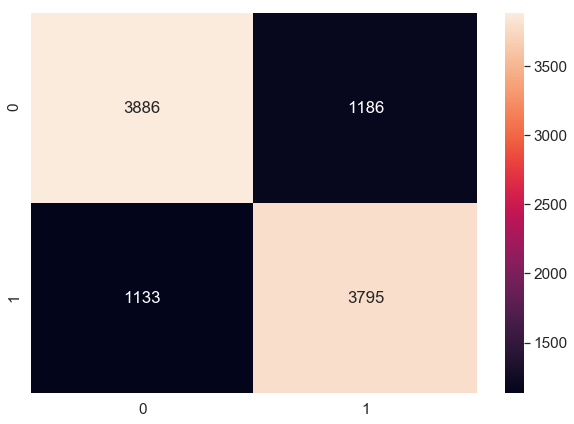

In [28]:
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [29]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print((accuracies.mean(), accuracies.std() * 2))

(0.7671748941656185, 0.009555810778450692)


In [30]:
# Analyzing Coefficients
pd.concat([pd.DataFrame(dataset.drop(columns = 'user').columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])],axis = 1)

,features,coef
0,dayofweek,0.032574
1,hour,-0.003600
2,age,-0.149688
3,numscreens,-0.130597
4,minigame,-0.026462
5,used_premium_feature,-0.065907
6,liked,0.010695
7,location,-0.028331
8,Institutions,-0.062195
9,VerifyPhone,0.650341


In [31]:
## Grid Search (Round 1)
from sklearn.model_selection import GridSearchCV

In [32]:
# Select Regularization Method
penalty = ['l1', 'l2']

In [33]:
# Create regularization hyperparameter space
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

In [34]:
# Combine Parameters
parameters = dict(C=C, penalty=penalty)

grid_search = GridSearchCV(estimator = classifier,param_grid = parameters,scoring = "accuracy",
                           cv = 10,n_jobs = -1)

grid_search = grid_search.fit(X_train, y_train)



rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

(0.7674, {'C': 0.01, 'penalty': 'l2'})

In [35]:
# Select Regularization Method
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = [0.1, 0.5, 0.9, 1, 2, 5]

In [36]:
# Combine Parameters
parameters = dict(C=C, penalty=penalty)

grid_search = GridSearchCV(estimator = classifier,param_grid = parameters,scoring = "accuracy",
                           cv = 10,n_jobs = -1)

grid_search = grid_search.fit(X_train, y_train)


rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_

In [37]:
print(rf_best_parameters)
print(grid_search.best_score_)

{'C': 0.5, 'penalty': 'l2'}
0.767225


In [38]:
# Formatting Final Results
final_results = pd.concat([y_test, test_identity], axis = 1).dropna()
final_results['predicted_reach'] = y_pred
final_results = final_results[['user', 'enrolled', 'predicted_reach']].reset_index(drop=True)

In [39]:
final_results

,user,enrolled,predicted_reach
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
5,65042,1,0
6,207226,1,1
7,363062,0,0
8,152296,1,1
9,64484,0,0
